In [1]:
#@title Part 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

#@markdown 1. Loading the Dataset
data = pd.read_csv('Netflix_Userbase.csv')

#@markdown 2. Missing Values
print(data.isnull().sum())

#@markdown 3. Encode Categorical Variables
data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop(['User ID', 'Monthly Revenue'], axis=1)
Y = data_encoded['Monthly Revenue']

#@markdown 4. Feature Selection
#@markdown - I have selected all features because every piece of the data is relevant to the context.

data_encoded.head()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


,User ID,Monthly Revenue,Age,Subscription Type_Premium,Subscription Type_Standard,Join Date_01-05-23,Join Date_01-06-22,Join Date_01-07-22,Join Date_01-08-22,Join Date_01-09-22,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,1,10,28,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,2,15,35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,12,42,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,4,12,51,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,33,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


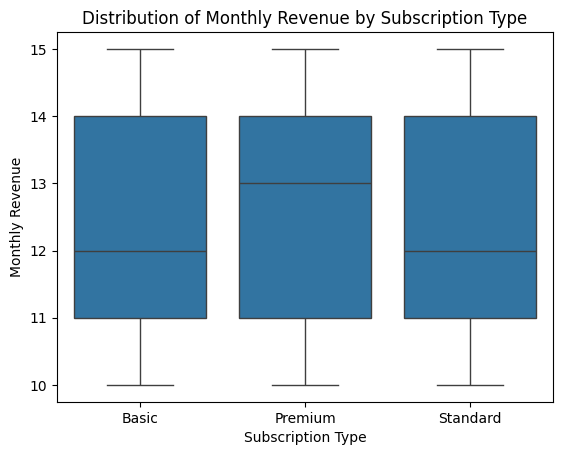

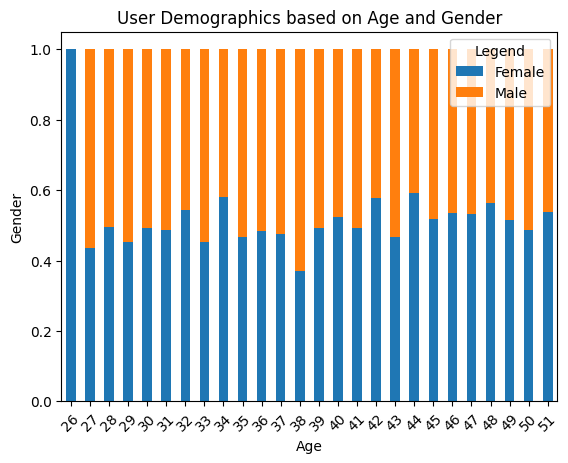

In [2]:
#@title Part 2: Exploratory Data Analysis (EDA)
#@markdown 1. Descriptive Statistics
print(data.describe())

#@markdown 2. Visualizations
# Monthly Revenue Distribution
sns.boxplot(data=data, x='Subscription Type', y='Monthly Revenue')
plt.title('Distribution of Monthly Revenue by Subscription Type')
plt.show()

# User Demographics
users = data.groupby('Age')['Gender'].value_counts(normalize=True).unstack()
users.plot(kind='bar', stacked=True)
plt.title('User Demographics based on Age and Gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Legend')
plt.xticks(rotation=45)
plt.show()

In [3]:
#@title Part 3: Linear Regression Model
#@markdown ## **Linear Regression Model Evaluation**:
#@markdown ## - **R-squared**:
#@markdown  - The model's R-squared got a number of -0.18. This means that the independent variables used in the model are aligned well on the dependent variable.

#@markdown ## - **Root Mean Squared Error (RMSE)**:
#@markdown  - The model's Root Mean Squared Error got a number of 1.80. This means that the model predicted the target value with slight inaccuracy.

# 1. Build the Model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# 2. Model Evaluation
Y_pred = lr_model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)

print("\nR-squared:\n", r2)
print("\nRMSE:\n", rmse)


R-squared:
 -0.17552958826823084

RMSE:
 1.8019423146739808


In [5]:
#@title Part 4: Logistic Regression Model (Predicting Customer Feedback)
#@markdown ## **Logistic Regression Model Evaluation**:
#@markdown ## - **Accuracy (11%)**:
#@markdown  - Accuracy measures the overall correctness of the model in predicting positive and negative feedback.

#@markdown ## - **Precision (13%)**:
#@markdown  - Precision measures the proportion of correctly predicted positive feedback out of all instances predicted as positive.

#@markdown ## - **Recall (11%)**:
#@markdown  - Recall measures the proportion of correctly predicted positive feedback out of all actual positive instances.

#@markdown ## - **F1 Score (11%)**:
#@markdown  - F1 Score is the harmonic mean of precision and recall, providing a balanced measure between the two.

#@markdown ## - **Confusion Matrix**:
#@markdown  - Confusion matrix provides a detailed breakdown of model performance, showing true positive, true negative, false positive, and false negative predictions.

# Building the model
X_logistic = data_encoded.drop(['User ID'], axis=1)
y_logistic = data_encoded['Age']
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

# Model Evaluation
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic, average='weighted')
recall = recall_score(y_test_logistic, y_pred_logistic, average='weighted')
f1 = f1_score(y_test_logistic, y_pred_logistic, average='weighted')
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.11
Precision: 0.1292377233301614
Recall: 0.11
F1 Score: 0.10740883388705749
Confusion Matrix:
 [[2 3 3 2 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 3 4 3 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 4 5 2 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 4 2 0 1 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 5 1 0 4 1 1 0 0 0 3 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 2 2 1 3 2 1 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 2 4 1 2 0 3 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 3 2 0 0 2 4 1 0 1 2 3 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 2 1 0 2 0 0 1 0 4 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 0 3 2 2 0 4 0 2 2 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 4 2 1 2 0 2 0 3 3 2 1 1 1 0 2 1 0 0]
 [0 0 0 0 2 0 3 1 4 1 0 0 2 1 1 1 1 0 0 0 0 2 0 0 0]
 [0 0 0 0 1 1 0 1 1 2 1 1 3 0 2 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 1 2 0 3 2 0 1 2 0 1 0 0 2 4 0 0]
 [0 0 0 0 0 0 0 0 4 0 1 1 4 2 6 1 0 1 1 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 2 2 4 2 3 0 0 0 4 1 1 2 0]
 [0 0 0 0 0 0 0 0 1 1 2 1 3 0 1 0 0 0 0 0 0 5

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#@title Part 5: Comparative Analysis and Visualization
#@markdown ## **Feature Importance Analysis:**
#@markdown **Linear Regression Model**
#@markdown - The feature of linear regression model got a prediction where Users are commonly using the Standard subscription type.

#@markdown **Logistic Regression Model**
#@markdown - The feature of logistic regression model is not defined because the data lacks a Feedback column and the logistic regression model needed Positive or Negative feedback from users.

#@markdown ## **Prediction Insights:**
#@markdown  - The patterns or insights that I can say would be that the Monthly Revenue of Netflix is heavily determined by the Subscription Type of the user where Premium users give the most number of Monthly Revenue. While in terms of feedback, the dataset lacks a Feedback data so this part is incomplete.

# Feature Importance for Linear Regression
lr_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
lr_coefficients = lr_coefficients.sort_values(by='Coefficient', ascending=False)
print(lr_coefficients)

# Feature Importance for Logistic Regression
logistic_coefficients = pd.DataFrame({'Feature': X_logistic.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print(logistic_coefficients)

# Visualization of Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_coefficients)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()